#### Exploratory data analysis (EDA):
Dataset: orders_autumn_2020
Data:
* TIMESTAMP: The date and time when the order was placed.
* ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES: The difference between the actual and estimated delivery times in minutes.
* ITEM_COUNT: # of items in the order.
* USER_LAT and USER_LONG: The latitude and longitude of the user's location.
* VENUE_LAT and VENUE_LONG: The latitude and longitude of the venue's location.
* ESTIMATED_DELIVERY_MINUTES: The estimated delivery time in minutes.
* ACTUAL_DELIVERY_MINUTES: The actual delivery time in minutes.
* CLOUD_COVERAGE: The cloud coverage at the time of the order.
* TEMPERATURE: The temperature at the time of the order.
* WIND_SPEED: The wind speed at the time of the order.
* PRECIPITATION: The precipitation level at the time of the order.

In [1]:
import pandas as pd

# load dataset
file_path = 'orders_autumn_2020.csv'
data = pd.read_csv(file_path)

# show first rows
data.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


Dataset statistics

In [2]:
# basic statistics dataset
basic_stats = data.describe()

missing_values = data.isnull().sum() # check for missing values

duplicate = data[data.duplicated()] # check for duplicate rows


basic_stats, missing_values, duplicate

(       ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES    ITEM_COUNT  \
 count                                       18706.000000     18706.000000   
 mean                                           -1.201058         2.688228   
 std                                             8.979834         1.886455   
 min                                           -41.000000         1.000000   
 25%                                            -7.000000         1.000000   
 50%                                            -2.000000         2.000000   
 75%                                             5.000000         4.000000   
 max                                            34.000000        11.000000   
 
            USER_LAT     USER_LONG     VENUE_LAT    VENUE_LONG  \
 count  18706.000000  18706.000000  18706.000000  18706.000000   
 mean      60.175234     24.941244     60.175643     24.941214   
 std        0.012674      0.016540      0.011509      0.014482   
 min       60.153000     24.9090

Visualize distributions of Delivery times differences, Item count, Temperature, Wind, and Precipitation 

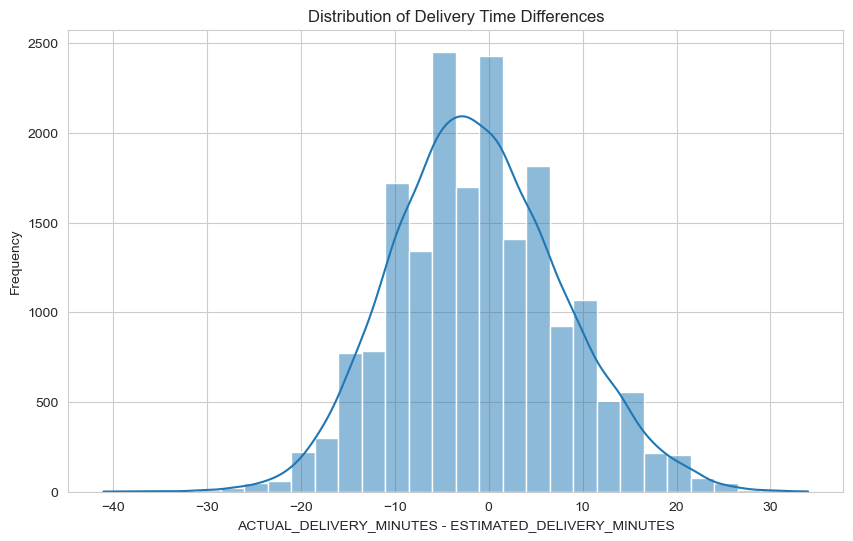

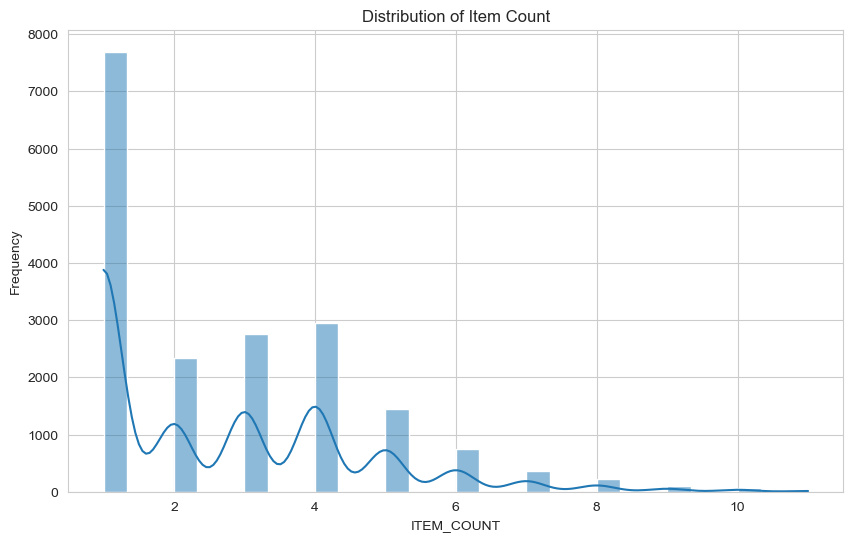

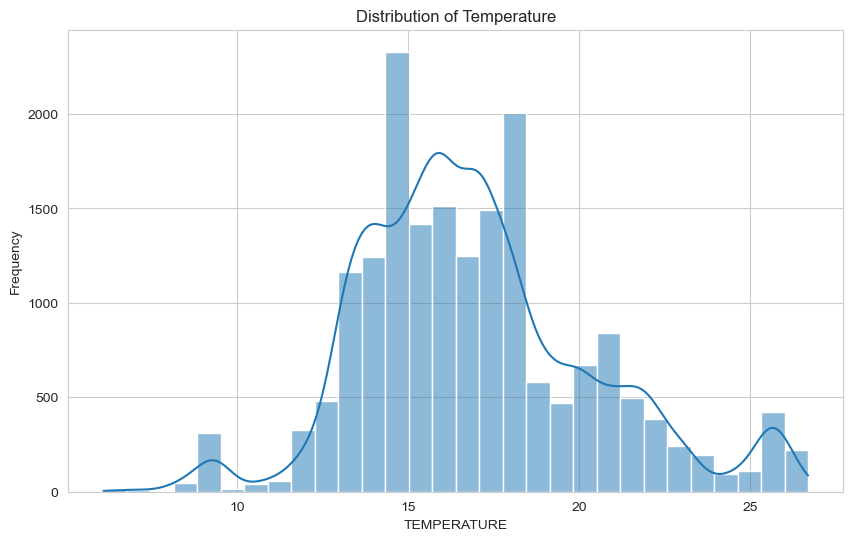

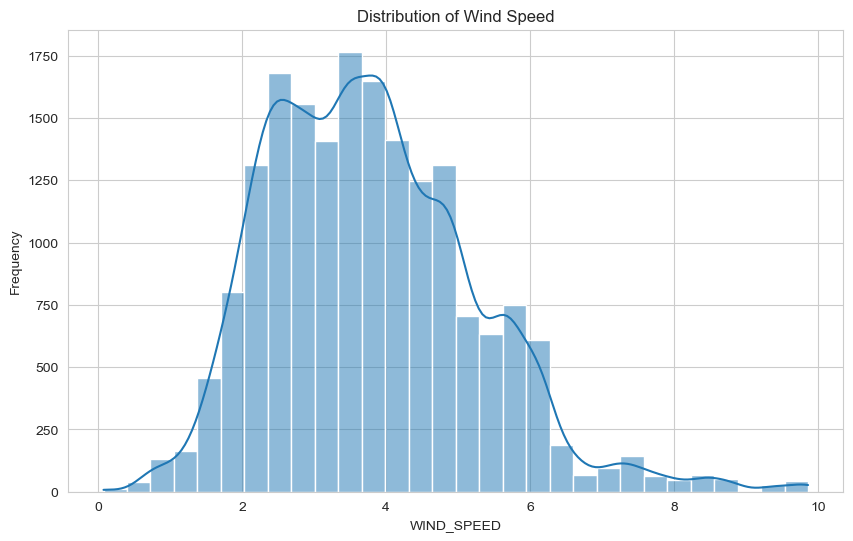

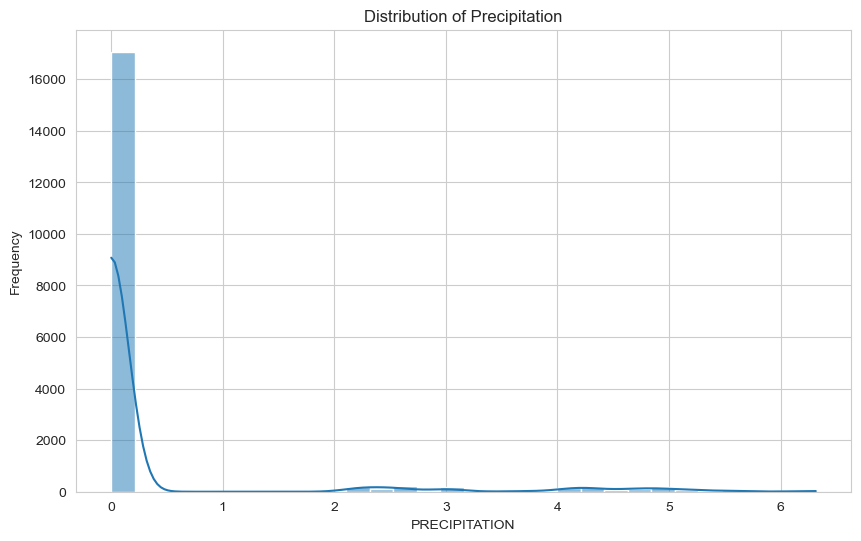

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# plot histogram function
def plot_histogram(data, column, title, bins=30, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# plotting histograms. This could help get some outliers in the data too. 
plot_histogram(data, 'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES', 'Distribution of Delivery Time Differences')
plot_histogram(data, 'ITEM_COUNT', 'Distribution of Item Count')
plot_histogram(data, 'TEMPERATURE', 'Distribution of Temperature')
plot_histogram(data, 'WIND_SPEED', 'Distribution of Wind Speed')
plot_histogram(data, 'PRECIPITATION', 'Distribution of Precipitation')


Correlation analysis. Get relationships between features of dataset. E.g. how is weather affecting delivery time (via heat map)

C:\Users\kyria\AppData\Local\Temp\ipykernel_27200\2785397682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson') # using pearson (standard correlation coefficient) method for calculating correlation matrix


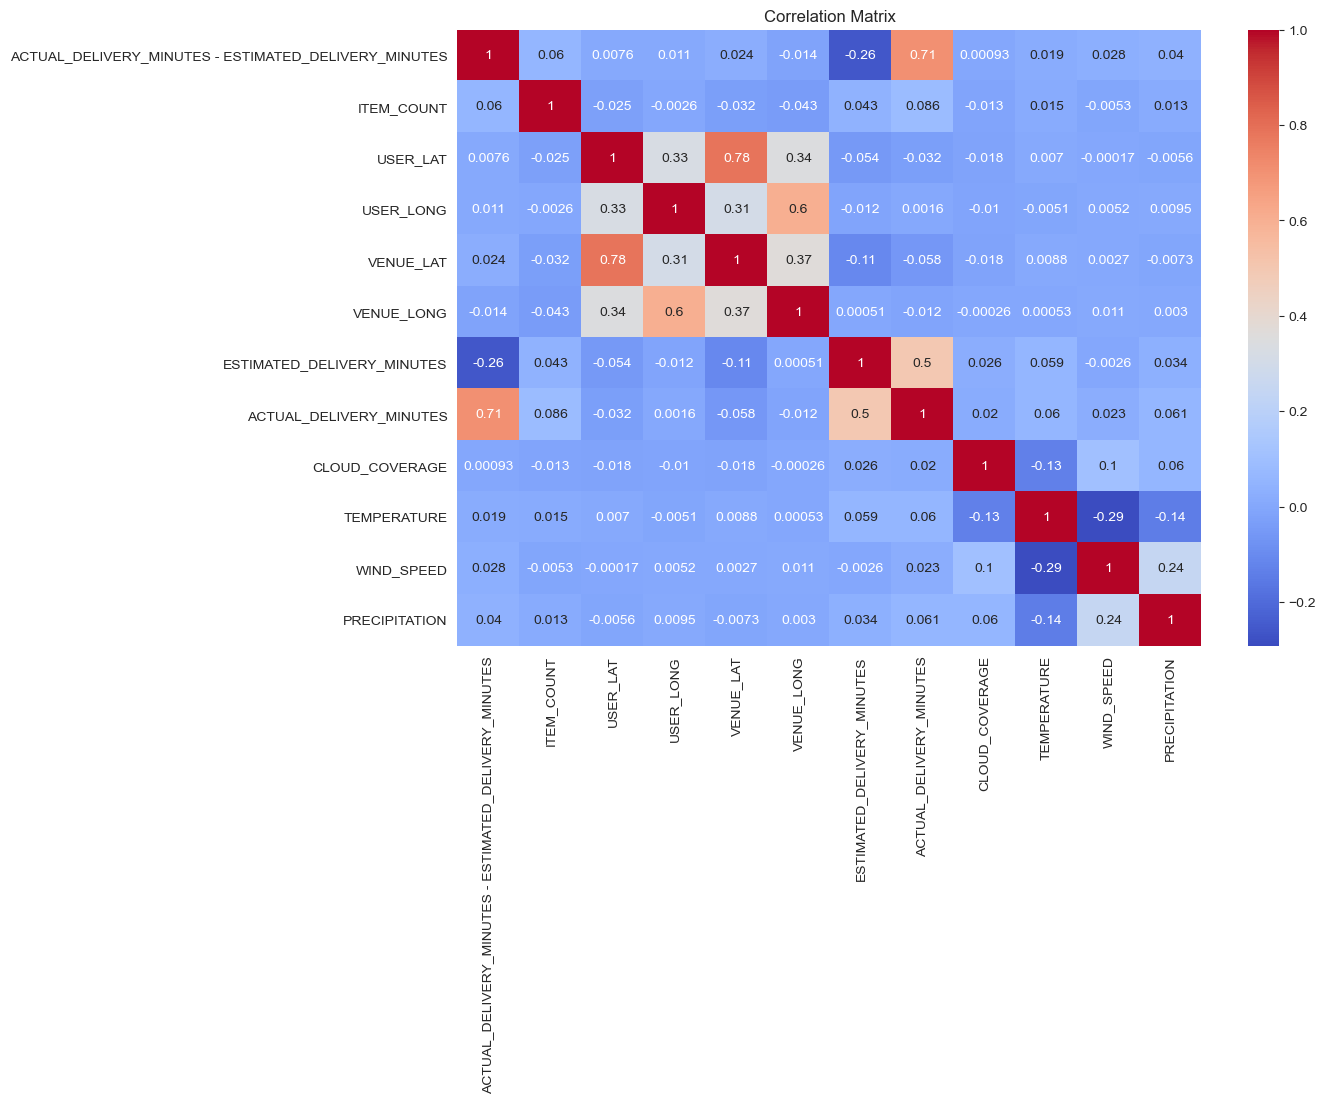

In [4]:
correlation_matrix = data.corr(method='pearson') # using pearson (standard correlation coefficient) method for calculating correlation matrix

# heatmap to visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Temporal: Get patterns of how orders vary by time. Peak orders times are shown

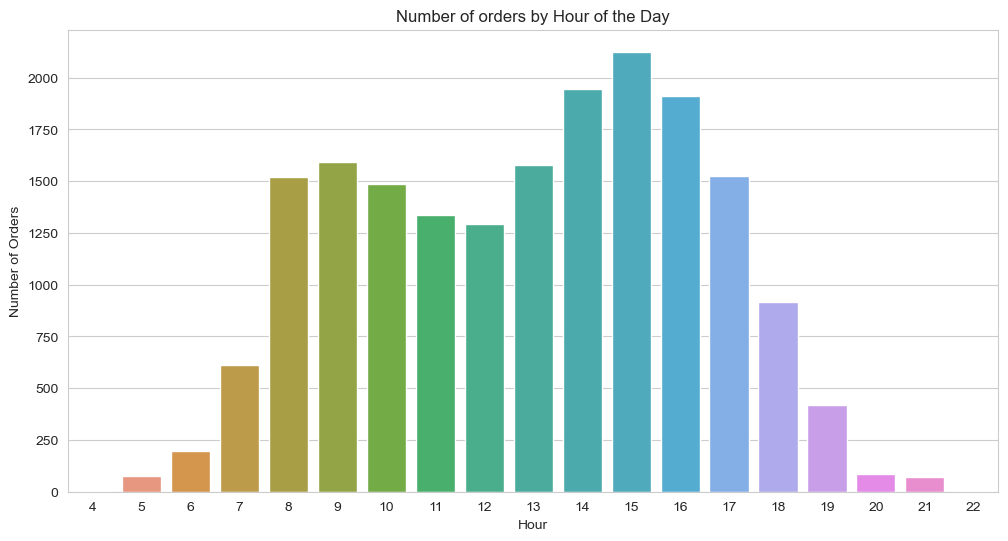

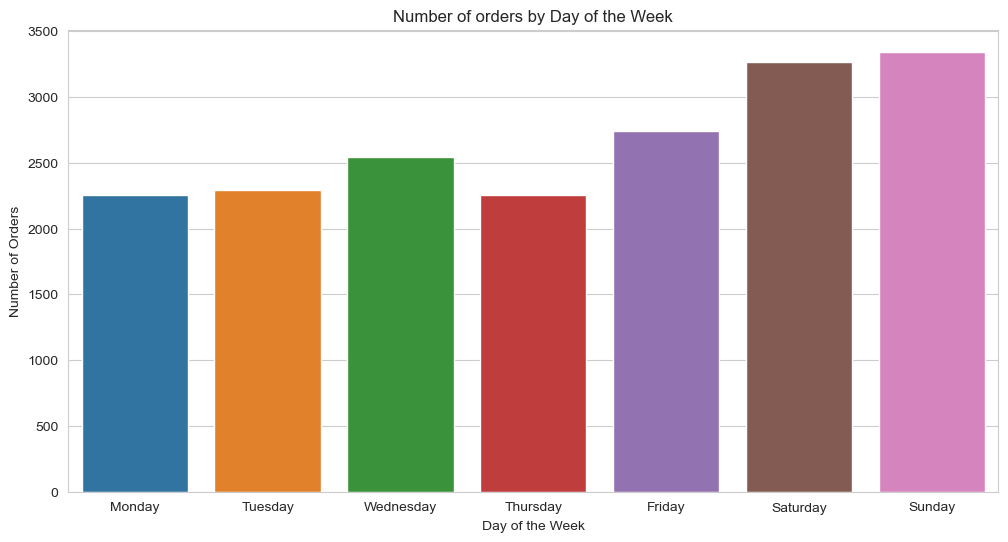

In [5]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])  # TIMESTAMP to datetime

data['Hour'] = data['TIMESTAMP'].dt.hour # data extraction --> getting hour
data['Day_Of_Week'] = data['TIMESTAMP'].dt.day_name() # same for day

# graphs for orders happened during a day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data)
plt.title('Number of orders by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

# same for daily orders
plt.figure(figsize=(12, 6))
order_by_day = sns.countplot(x='Day_Of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

Geographical analysis: Since we are dealing with geospatial, maybe looking into how the data of orders is distributed of orders can help identify popular areas 

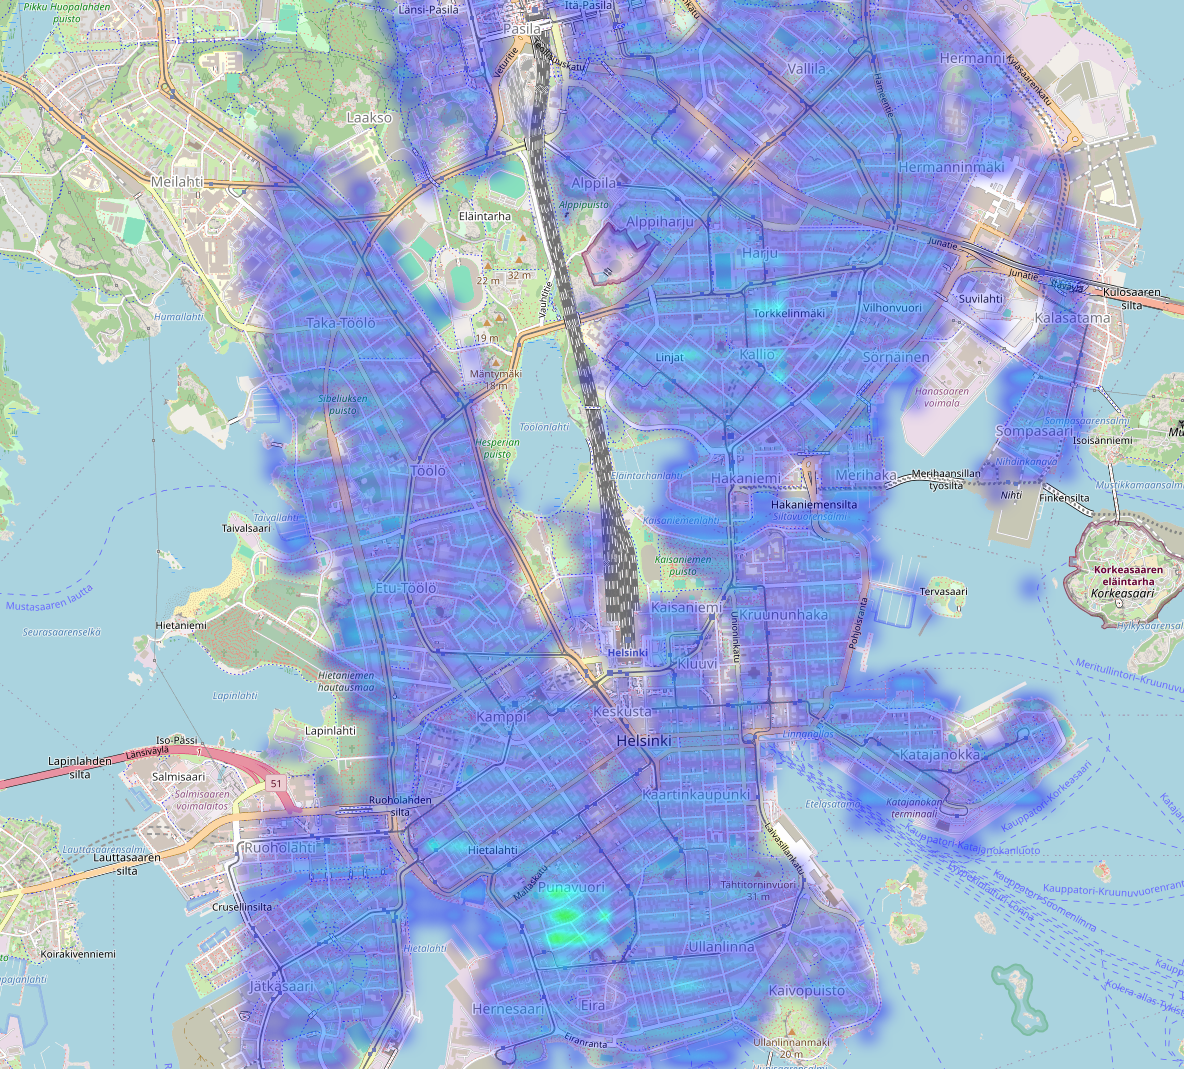

In [7]:
import folium.plugins # folium for map visualization
from IPython.display import Image

map_center = [data['USER_LAT'].mean(), data['USER_LONG'].mean()] # create map with given long and lat
map = folium.Map(location=map_center, zoom_start=13)

user_heatmap = folium.plugins.HeatMap(data[['USER_LAT', 'USER_LONG']], radius=10) # I used heat map for order locations of users
user_heatmap.add_to(map)

# show the map
map.save('user_heatmap.html')  # interstingly all data are from central Helsinki :) Good information that all is located in same place -> location can affect order prediction. 

# since I am uploading the assignment, I took a screenshot of the generated map to display it here as well (might be a bit cropped)
Image(filename='user_heatmap.png')

Weather analysis: looking into how weather conditions affect order volumns.
* For Temperature --> order volume might increase/decrease during extreme temperatures.
* For Precipitation --> order volume might increase during rainy or snowy conditions.
* For Wind speed --> similar to precipitation, people do not want to go out therefor might order more often.

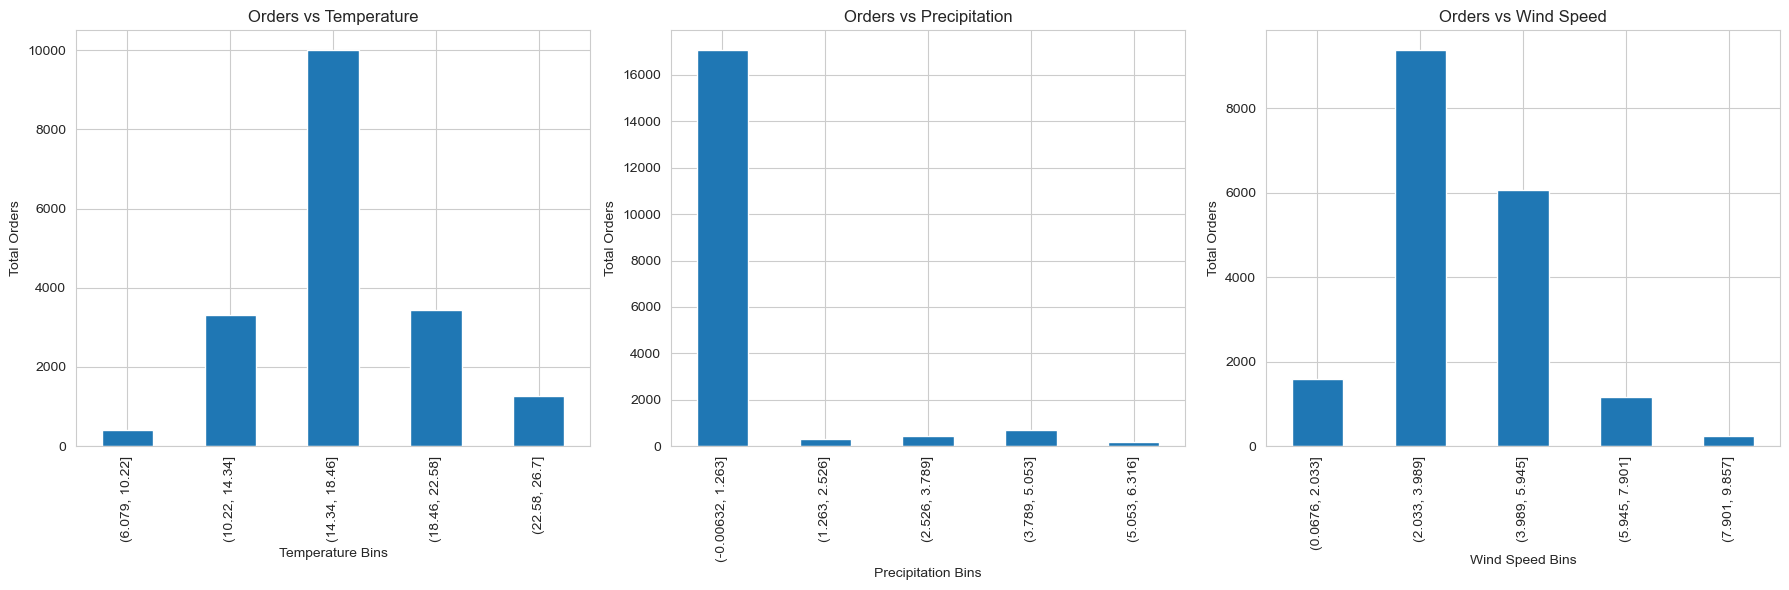

In [8]:
# groupping data based on temperature and we use bins to divide the values in that range
temperature_orders = data.groupby(pd.cut(data['TEMPERATURE'], bins=5)).size()  
 
# same for precipitation and wind speed
precipitation_orders = data.groupby(pd.cut(data['PRECIPITATION'], bins=5)).size()
wind_speed_orders = data.groupby(pd.cut(data['WIND_SPEED'], bins=5)).size()

# graphs for relationship between weather conditions and order volume
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
temperature_orders.plot(kind='bar')
plt.title('Orders vs Temperature')
plt.xlabel('Temperature Bins')
plt.ylabel('Total Orders')

plt.subplot(1, 3, 2)
precipitation_orders.plot(kind='bar')
plt.title('Orders vs Precipitation')
plt.xlabel('Precipitation Bins')
plt.ylabel('Total Orders')

plt.subplot(1, 3, 3)
wind_speed_orders.plot(kind='bar')
plt.title('Orders vs Wind Speed')
plt.xlabel('Wind Speed Bins')
plt.ylabel('Total Orders')

plt.tight_layout()
plt.show()

Instead of looking into the dataset analysis from the above EDA, we can also train a ML model to show the most important features. Since my prediction task is to forecast daily order volume in the future, I need an approximation of order volume as our target variable (will aggregate the numbers of order per certain time interval -- will use day).

Steps:
* **Handling Missing Values**: Replace missing values with mean.
* **Define Order Volume**: Aggregate the data to calculate the total number of orders per day.
* **Feature Engineering**: Create relevant features that might influence order volume, like hour of the day, day of the week and season. 
* **Modeling**: Train a ML model suitable for regression (--> Random Forest Regressor) to predict order volume.
* **Feature Importance**: Evaluate which features are most influential in predicting order volume. In the first example I use build in *feature_importances_* function which is based on the mean decrease in impurity. 

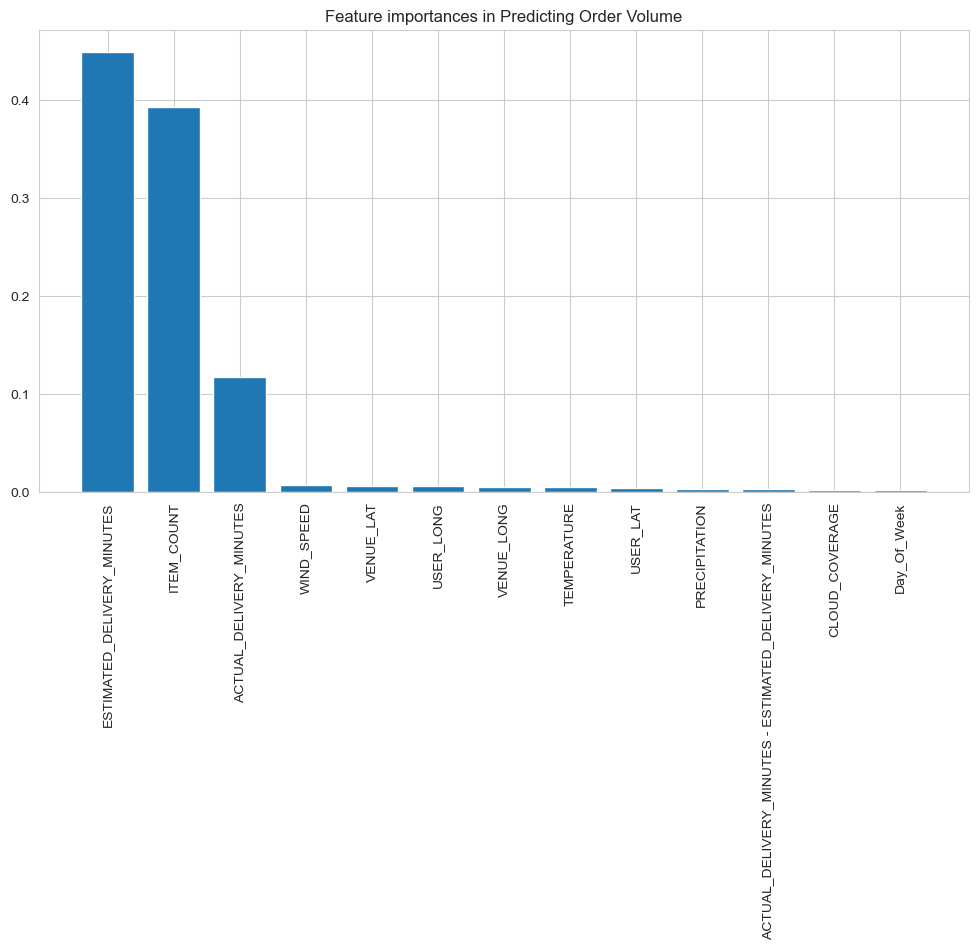

In [9]:
from sklearn.ensemble import RandomForestRegressor # random forest regressor to calculate feature importance
import numpy as np

data = pd.read_csv('orders_autumn_2020.csv')

# TIMESTAMP to datetime and set as the index
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data.set_index('TIMESTAMP', inplace=True)

data.fillna(data.mean(), inplace=True) # filling missing values with mean

# aggregate data to daily level
daily_data = data.resample('D').agg({
    'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES': 'mean',
    'ITEM_COUNT': 'sum', # total number of items ordered that day 
    'USER_LAT': 'mean',
    'USER_LONG': 'mean', # for geospatial data -> mean for central loc
    'VENUE_LAT': 'mean',
    'VENUE_LONG': 'mean', 
    'ESTIMATED_DELIVERY_MINUTES': 'sum', # summing these might help the model understand volume of activity --> days with high volume = busier periods = high order volume
    'ACTUAL_DELIVERY_MINUTES': 'sum',
    'CLOUD_COVERAGE': 'mean', # for weather condition makes sense to have mean of the day
    'TEMPERATURE': 'mean',
    'WIND_SPEED': 'mean',
    'PRECIPITATION': 'mean'
})

# target variable: total # of orders each day
daily_data['Order_Volume'] = data.resample('D').size()

# get weekday as features
data['Day_Of_Week'] = data.index.day_name()
date_info = data['Day_Of_Week'].groupby(data.index.date).agg(lambda x: x.mode()[0]) # add weekday into daily data
daily_data = daily_data.merge(date_info, left_index=True, right_index=True)

daily_data['Day_Of_Week'] = daily_data['Day_Of_Week'].astype('category').cat.codes # encode Day_Of_Week

X = daily_data.drop(['Order_Volume'], axis=1) # train set 
y = daily_data['Order_Volume'] # target set --> order volume

# fitting model
model = RandomForestRegressor()  
model.fit(X, y)

feature_importances = model.feature_importances_ # feature importances calculation
features = X.columns

sorted_indices = np.argsort(feature_importances)[::-1] # sort scores desc

# bar chart to show features' importance
plt.figure(figsize=(12, 6))
plt.title('Feature importances in Predicting Order Volume')
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), features[sorted_indices], rotation=90)
plt.show()

Permutation feature importance: 
Involves randomly shuffling the values of a single feature and observing the resulting degradation of the model’s score. By breaking the relationship between the feature and the target, we determine how much the model relies on such particular feature.

*Reference: https://scikit-learn.org/stable/modules/permutation_importance.html, L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.*

Mean squared error: 190.72492105263163


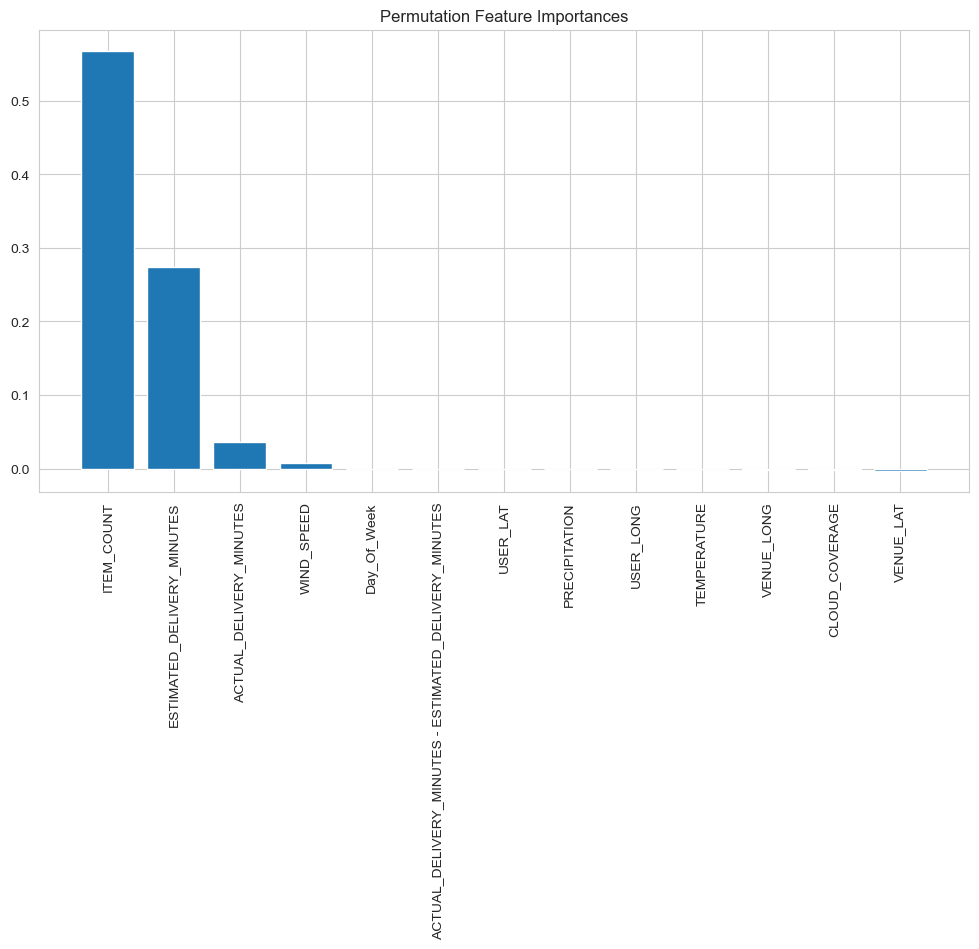

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit model again
model = RandomForestRegressor()
model.fit(X_train, y_train)

# predict using test set and calculating error metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse) # error

# permutation importance
perm_importance = permutation_importance(model, X_test, y_test)

# bar chart to show features' importance
sorted_perm_indices = perm_importance.importances_mean.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.title('Permutation Feature Importances')
plt.bar(range(len(sorted_perm_indices)), perm_importance.importances_mean[sorted_perm_indices], align='center')
plt.xticks(range(len(sorted_perm_indices)), X.columns[sorted_perm_indices], rotation=90)
plt.show()

Plotting different 7-day timeframes

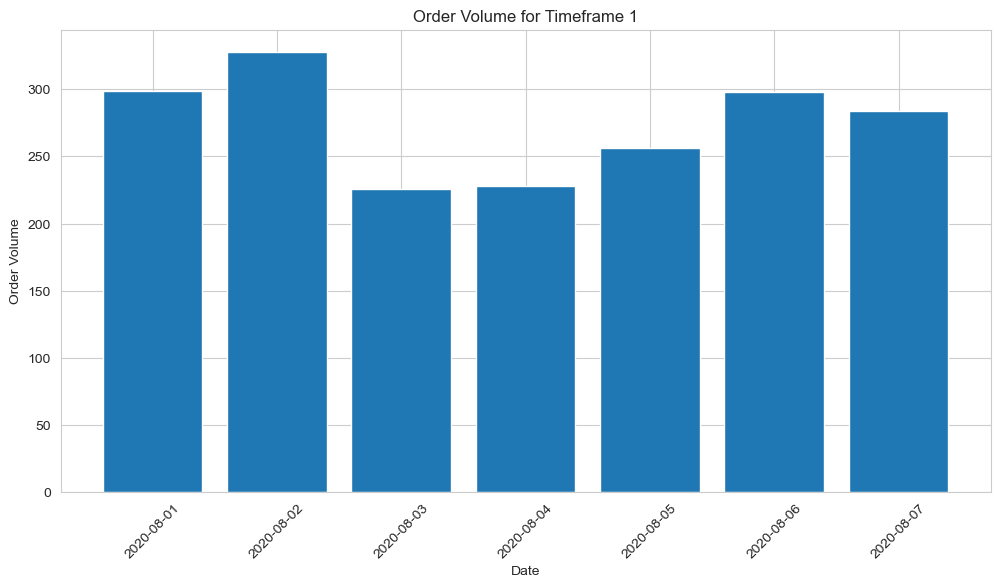

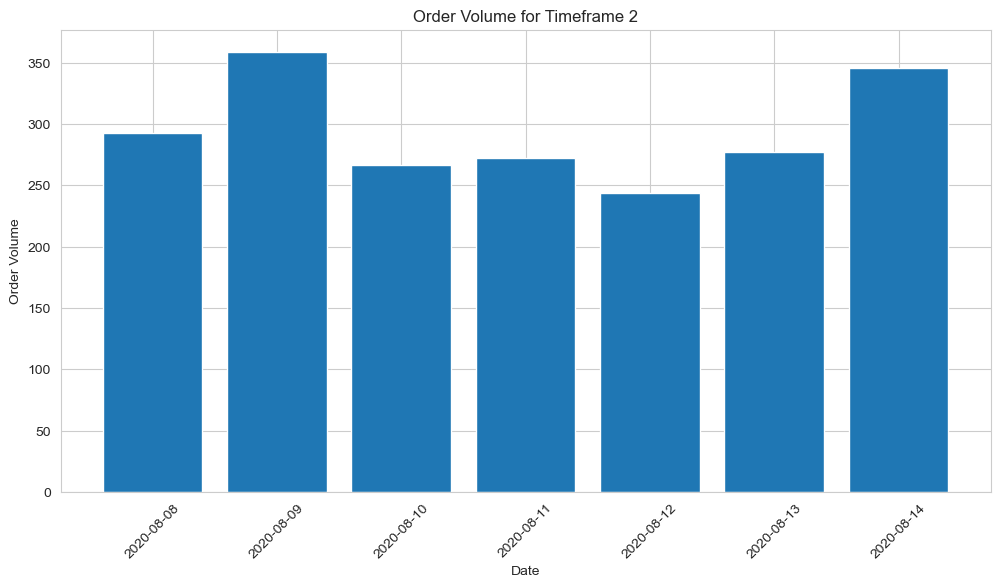

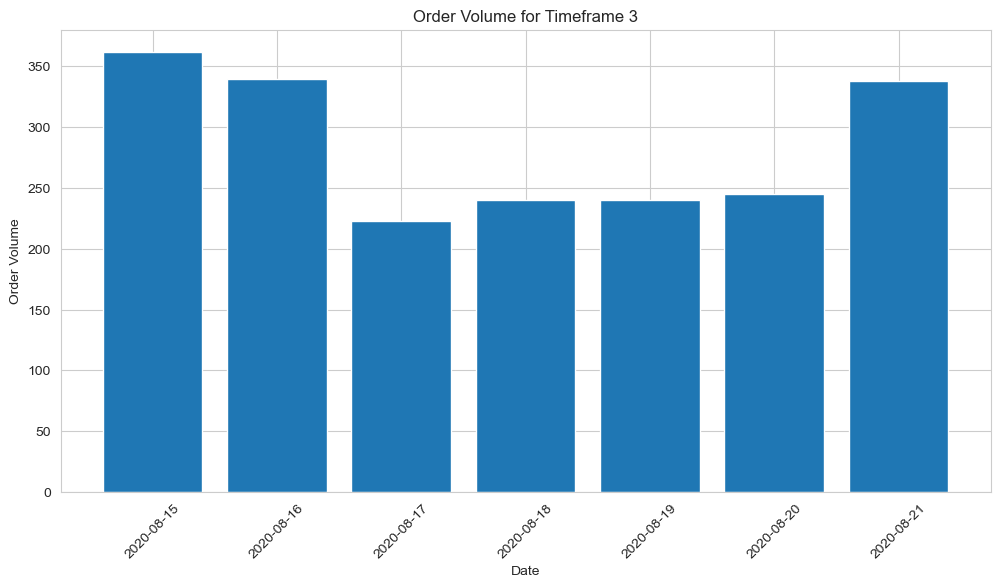

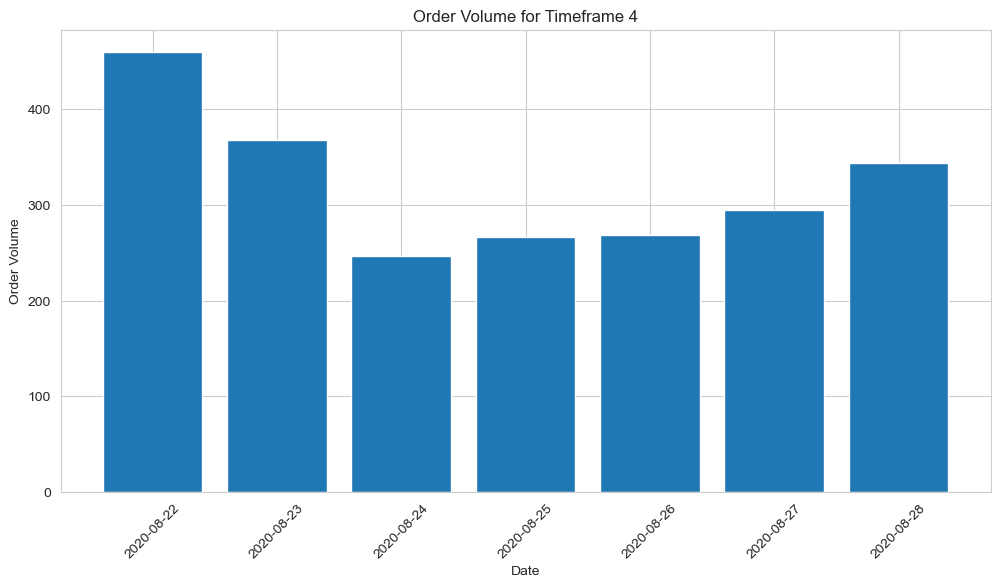

In [11]:
# group inf by date and counting the number of orders
order_volume_daily = daily_data['Order_Volume']

# plotting timeframe
def plot_timeframe(start_index, end_index, timeframe_number):
    plt.figure(figsize=(12, 6))
    plt.bar(order_volume_daily.index[start_index:end_index], order_volume_daily.values[start_index:end_index])
    plt.xlabel('Date')
    plt.ylabel('Order Volume')
    plt.title(f'Order Volume for Timeframe {timeframe_number}')
    plt.xticks(rotation=45)
    plt.show()

# four different timeframes
plot_timeframe(0, 7, 1)   # first 7 days
plot_timeframe(7, 14, 2)  # next 7 days
plot_timeframe(14, 21, 3) # next 7 days
plot_timeframe(21, 28, 4) # next 7 days